In [6]:
from dqnotebook import QuadraticDrawer

In [7]:
%matplotlib notebook

In [8]:
from cmath import rect, pi, sqrt

In [9]:
from obj import QuadraticDifferential
import matplotlib as mpl
#mpl.use("pgf")
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


<IPython.core.display.Javascript object>


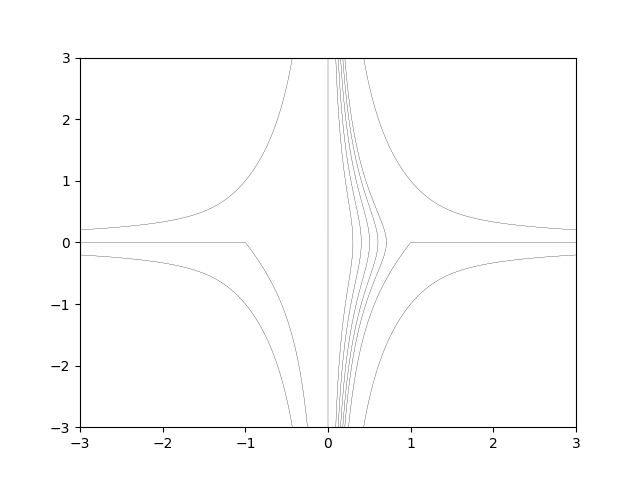

In [6]:
fig = plt.figure()
quad= QuadraticDifferential()
quad_drawer = QuadraticDrawer(quad, fig)

In [10]:
quad.phase=rect(1,0)
quad_drawer.draw_trajectories()

............

In [ ]:
fig2=plt.figure()
quad_drawer2=QuadraticDrawer(quad,fig2)

In [ ]:
quad.phase=rect(1,pi)
quad_drawer2.draw_trajectories()

In [8]:
quad.add_plotpoint(complex(1,1))
quad.add_plotpoint(complex(1,-1))
quad.add_plotpoint(complex(-1,1))
quad.add_plotpoint(complex(-1,-1))
quad.add_plotpoint(complex(-1.5,0))
quad.add_plotpoint(complex(1.5,0))
quad.add_plotpoint(complex(0,0))
quad.add_plotpoint(complex(0.3,0.1))
quad.add_plotpoint(complex(0.4,0.1))
quad.add_plotpoint(complex(0.5,0.1))
quad.add_plotpoint(complex(0.6,0.1))
quad.add_plotpoint(complex(0.7,0.1))

In [ ]:
for x in range(10):
    quad.add_plotpoint(complex(0.1,-0.1*x))

In [9]:
quad.add_zero(complex(1,0.0001))
quad.add_zero(complex(-1,0))

In [ ]:
quad.add_dblpole(complex(0,1))

In [ ]:
quad.add_dblpole(complex(0,-1))

In [ ]:
quad_drawer.draw_trajectories()

In [ ]:
print quad.zeros
print quad.dblpoles

<IPython.core.display.Javascript object>


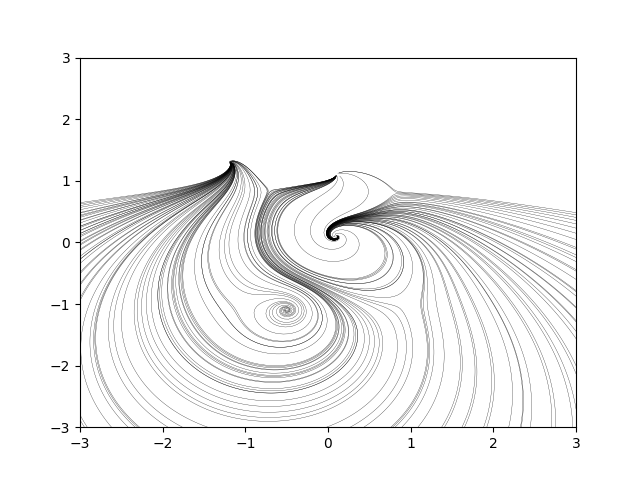

In [11]:
fig3=plt.figure()
quad3=QuadraticDifferential()
quad_drawer3=QuadraticDrawer(quad3,fig3)
quad_drawer3.draw_trajectories()

In [12]:
quad3.zeros=[complex(-1,-1),complex(.9,-1),complex(.8,.8),complex(-.7,.85)]

In [13]:
quad3.dblpoles=[complex(.1,.1),complex(-.5,-1.1),complex(0.1,1.1),complex(-1.2,1.3)]

In [14]:
quad3.plotpoints = []

In [15]:
for x in range(30):
    quad3.add_plotpoint(complex(-2+.2*x,.3))

In [16]:
for x in range(30):
    quad3.add_plotpoint(complex(-2+.2*x,-.6))

In [17]:
for x in range(30):
    quad3.add_plotpoint(complex(-2+.2*x,-2))

In [18]:
quad_drawer3.draw_trajectories()

..........................................................................................

In [22]:
tr= quad3.trajectories[((0.6000000000000001-0.6j), (1+0j))]

In [26]:
tr.coordinates.tolist().index([tr.plotpoint.real,tr.plotpoint.imag])

58

In [10]:
def hacer_reticula(quad, punto, paso, longitud):
    t1 = quad.compute_trajectory(punto)
    quad.phase = quad.phase*complex(-1,0)
    t2 = quad.compute_trajectory(punto)
    coord1=t1.coordinates.tolist()
    coord2=t2.coordinates.tolist()
    plots = []
    plots_ort = []
    recorrido = 0
    num_paso = 1
    start1 = coord1.index([t1.plotpoint.real, t1.plotpoint.imag])
    start2 = coord2.index([t2.plotpoint.real, t2.plotpoint.imag])
    while recorrido < longitud:
        paso_inicio = complex(coord1[start1][0],coord1[start1][1])
        paso_fin = complex(coord1[start1+1][0],coord1[start1+1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start1 += 1
        if recorrido >= num_paso*paso:
            plots_ort.append(paso_fin)
            num_paso += 1
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord2[start2][0],coord2[start2][1])
        paso_fin = complex(coord2[start2+1][0],coord2[start2+1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start2 += 1
        if recorrido >= num_paso*paso:
            plots.append(paso_fin)
            num_paso += 1
    start1 = coord1.index([t1.plotpoint.real, t1.plotpoint.imag])
    start2 = coord2.index([t2.plotpoint.real, t2.plotpoint.imag])
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord1[start1][0],coord1[start1][1])
        paso_fin = complex(coord1[start1-1][0],coord1[start1-1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start1 -= 1
        if recorrido >= num_paso*paso:
            plots_ort.append(paso_fin)
            num_paso += 1
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord2[start2][0],coord2[start2][1])
        paso_fin = complex(coord2[start2-1][0],coord2[start2-1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start2 -= 1
        if recorrido >= num_paso*paso:
            plots.append(paso_fin)
            num_paso += 1
    quad.plotpoints = quad.plotpoints + plots + plots_ort
        

<IPython.core.display.Javascript object>


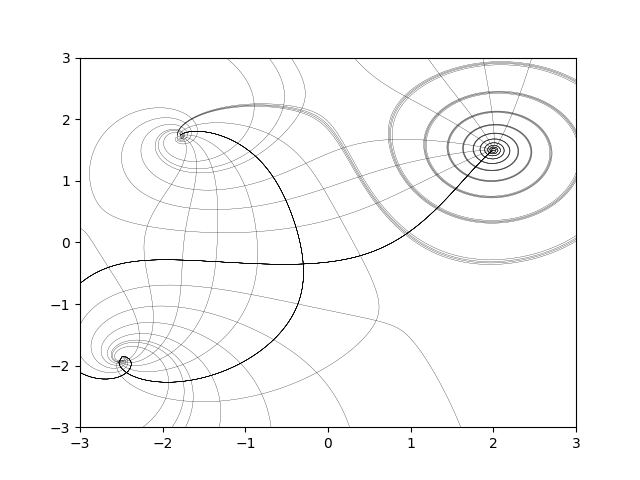

..........................................

In [179]:
fig4=plt.figure()
quad4=QuadraticDifferential()
quad_drawer4=QuadraticDrawer(quad4,fig4)
quad_drawer4_ort=QuadraticDrawer(quad4,fig4)
quad4.zeros=[complex(0.1,2.3), complex(1,-1.2),complex(-2.9,0.3)]
quad4.dblpoles = [complex(2,1.5),complex(-1.8,1.7), complex(-2.5,-1.9)]
quad4.plotpoints = []
quad4.trajectories = {}
hacer_reticula(quad4, complex(-.3,-.35), 0.1, .5)
quad4.phase=complex(1,0)
quad_drawer4.draw_trajectories()
quad4.phase=complex(-1,0)
quad_drawer4_ort.draw_trajectories()

<IPython.core.display.Javascript object>


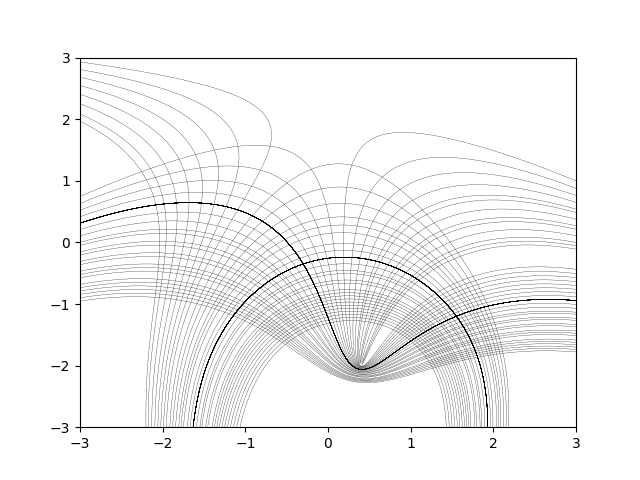

......................................................................................................................................

In [14]:
fig5=plt.figure()
quad5=QuadraticDifferential()
quad_drawer5=QuadraticDrawer(quad5,fig5)
quad_drawer5_ort=QuadraticDrawer(quad5,fig5)
quad5.zeros=[complex(0.1,2.3),complex(0.1,2.3),complex(0.1,2.3) ]
quad5.dblpoles = []
quad5.smplpoles = [complex(0.4,-2)]
quad5.plotpoints = []
quad5.trajectories = {}
hacer_reticula(quad5, complex(-.3,-.35), 0.3, 5)
quad5.phase=complex(1,0)
quad_drawer5.draw_trajectories()
quad5.phase=complex(-1,0)
quad_drawer5_ort.draw_trajectories()

<IPython.core.display.Javascript object>


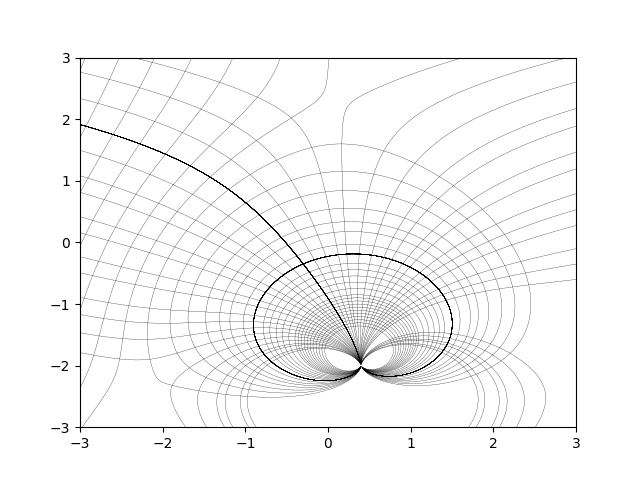

....................................................................................................................................

In [17]:
fig6=plt.figure()
quad6=QuadraticDifferential()
quad_drawer6=QuadraticDrawer(quad6,fig6)
quad_drawer6_ort=QuadraticDrawer(quad6,fig6)
quad6.zeros=[complex(0.1,2.3),complex(-2.1,-2.3),complex(3.1,-2.3) ]
quad6.dblpoles = [complex(0.4,-2)]
quad6.smplpoles = [complex(0.4,-2)]
quad6.plotpoints = []
quad6.trajectories = {}
hacer_reticula(quad6, complex(-.3,-.35), 0.3, 5)
quad6.phase=complex(1,0)
quad_drawer6.draw_trajectories()
quad6.phase=complex(-1,0)
quad_drawer6_ort.draw_trajectories()

<IPython.core.display.Javascript object>


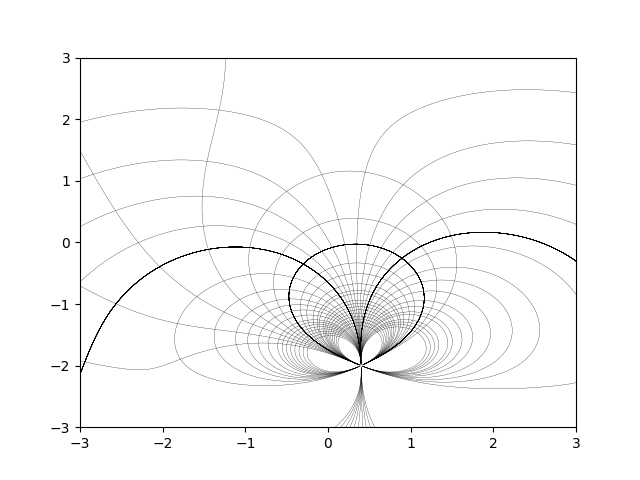

..........................................................................................................................

In [18]:
fig7=plt.figure()
quad7=QuadraticDifferential()
quad_drawer7=QuadraticDrawer(quad7,fig7)
quad_drawer7_ort=QuadraticDrawer(quad7,fig7)
quad7.zeros=[complex(0.1,2.3),complex(-2.1,-2.3),complex(3.1,-2.3) ]
quad7.dblpoles = [complex(0.4,-2),complex(0.4,-2)]
quad7.smplpoles = [complex(0.4,-2)]
quad7.plotpoints = []
quad7.trajectories = {}
hacer_reticula(quad7, complex(-.3,-.35), 0.3, 5)
quad7.phase=complex(1,0)
quad_drawer7.draw_trajectories()
quad7.phase=complex(-1,0)
quad_drawer7_ort.draw_trajectories()

<IPython.core.display.Javascript object>


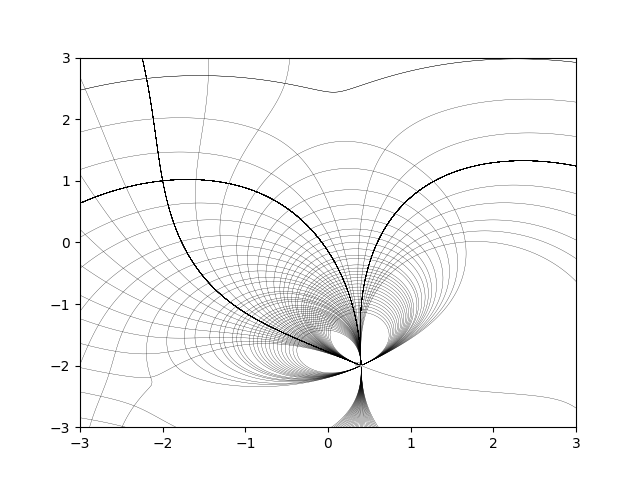

..mierda
..........................................................................................................................................................................................................................................

In [20]:
fig8=plt.figure()
quad8=QuadraticDifferential()
quad_drawer8=QuadraticDrawer(quad8,fig8)
quad_drawer8_ort=QuadraticDrawer(quad8,fig8)
quad8.zeros=[complex(0.1,2.3),complex(-2.1,-2.3),complex(3.1,-2.3) ]
quad8.dblpoles = [complex(0.4,-2),complex(0.4,-2)]
quad8.smplpoles = [complex(0.4,-2)]
quad8.plotpoints = []
quad8.trajectories = {}
hacer_reticula(quad8, complex(-2,1), 0.1, 4)
quad8.phase=complex(1,0)
quad_drawer8.draw_trajectories()
quad8.phase=complex(-1,0)
quad_drawer8_ort.draw_trajectories()

<IPython.core.display.Javascript object>


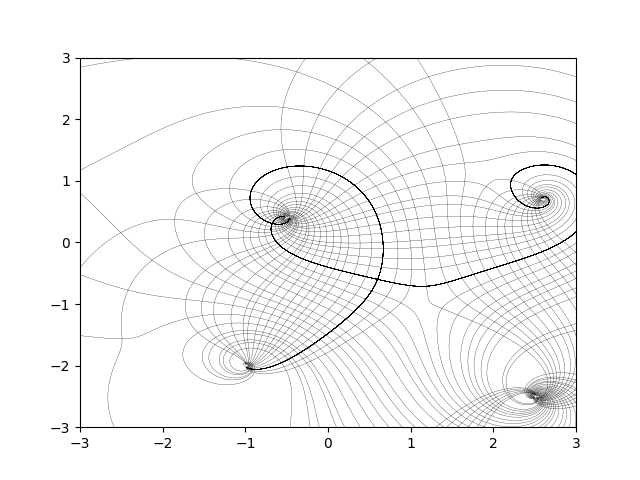

..................................................................................................................

In [32]:
fig9=plt.figure()
quad9=QuadraticDifferential()
quad_drawer9=QuadraticDrawer(quad9,fig9)
quad_drawer9_ort=QuadraticDrawer(quad9,fig9)
quad9.zeros=[complex(1.2,-1),complex(2,1.1),complex(-2,0.9), complex(-2.3,-1.7) ]
quad9.dblpoles = [complex(2.5,-2.5), complex(2.6, 0.7), complex(-0.5, 0.4), complex(-1,-2)]
quad9.plotpoints = []
quad9.trajectories = {}
hacer_reticula(quad9, complex(.6,-.6), 0.03, 0.42)
quad9.phase=complex(1,0)
quad_drawer9.draw_trajectories()
quad9.phase=complex(-1,0)
quad_drawer9_ort.draw_trajectories()

In [33]:
hacer_reticula(quad9, complex(.6,-.6), 0.03, 0.48)
quad9.phase=complex(1,0)
quad_drawer9.draw_trajectories()
quad9.phase=complex(-1,0)
quad_drawer9_ort.draw_trajectories()

..................

<IPython.core.display.Javascript object>


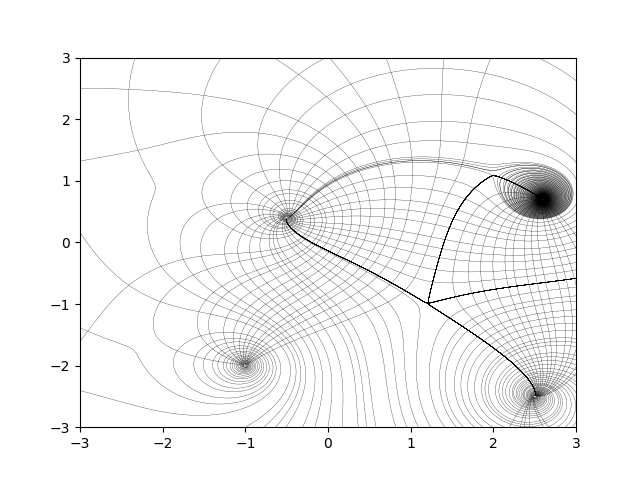

..........................................................
........................................................


In [100]:
fig9=plt.figure()
quad9=QuadraticDifferential()
quad9.phase=nueva_fase
quad_drawer9=QuadraticDrawer(quad9,fig9)
quad_drawer9_ort=QuadraticDrawer(quad9,fig9)
quad9.zeros=[complex(1.2,-1),complex(2,1.1),complex(-2,0.9), complex(-2.3,-1.7) ]
quad9.dblpoles = [complex(2.5,-2.5), complex(2.6, 0.7), complex(-0.5, 0.4), complex(-1,-2)]
quad9.plotpoints = []
quad9.trajectories = {}
hacer_reticula(quad9, complex(1.21,-.99), 0.03, 0.42)
quad9.phase=quad9.phase*complex(-1,0)
quad_drawer9.draw_trajectories()
quad9.phase=quad9.phase*complex(-1,0)
quad_drawer9_ort.draw_trajectories()

In [58]:
limite= 5.0
quad_drawer9.ax.set_ylim(-1*limite,limite)
quad_drawer9.ax.set_xlim(-1*limite,limite)
fig9.set_size_inches(10,10)

In [1]:
from obj import Monodromy

In [21]:
def integrar(x,y,quad, pasos):
    paso = (y-x)/pasos
    medio_paso = paso/2
    mon=Monodromy(quad(x))
    integral = 0
    for i in range(pasos):
        integral += mon.dist(quad(x+medio_paso))*paso*sqrt(abs(quad.QD(x+medio_paso)))
        x+=paso
        mon(x)
    return integral

In [32]:
quad9.phase= complex(1,0)

In [33]:
integrar(complex(1.201,-1),complex(2,1.101),quad9,20)

(0.11893143198586442+0.31124253317894685j)

In [34]:
integrar(complex(1.201,-1),complex(2,1.101),quad9,40)

(0.11889837268577416+0.3106497432620332j)

In [35]:
integrar(complex(1.201,-1),complex(2,1.101),quad9,100)

(0.11889213450212356+0.31040824929343963j)

In [36]:
integrar(complex(1.201,-1),complex(2,1.101),quad9,1000)

(0.11890195811295376+0.31032661894113267j)

In [37]:
integrar(complex(1.201,-1),complex(2,1.101),quad9,5000)

(0.11890336558400098+0.3103268803946349j)

In [38]:
nueva_fase = integrar(complex(1.201,-1),complex(2,1.101),quad9,10000)
nueva_fase= nueva_fase/abs(nueva_fase)

In [51]:
nueva_fase=nueva_fase**-2

In [61]:
integrar(complex(1.201,-1),complex(2,1.101),quad9,50)

(-9.068490298551617e-05+0.33253906091497587j)

In [62]:
def real_error(n):
    return integrar(complex(1.201,-1),complex(2,1.101),quad9,n).real

In [64]:
real_error(100)

-3.962597862852674e-05

In [65]:
from numpy import arange

In [97]:
x=arange(1,100)
x = [500*i for i in x]

In [98]:
y = [abs(real_error(i)) for i in x]

<IPython.core.display.Javascript object>


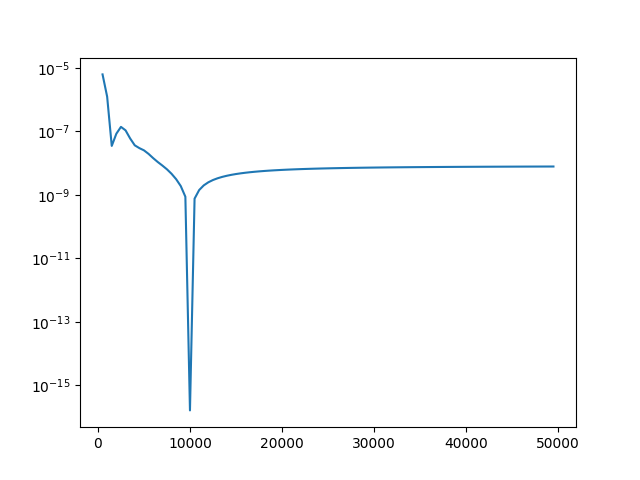

In [99]:
fig_error = plt.figure()
plt.plot(x, y)
plt.yscale('log')

<IPython.core.display.Javascript object>


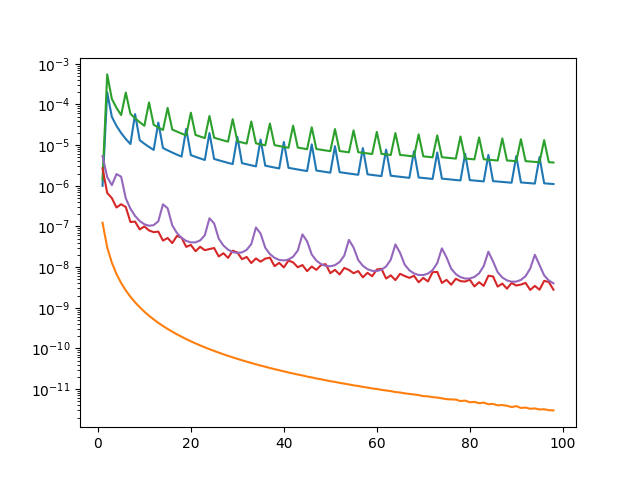

In [101]:
fig_error2=plt.figure()

In [119]:
x=arange(1,100)
x = [500*i for i in x]
y = [integrar(complex(2,1.69),complex(2,-0.9),quad9,i) for i in x]

In [120]:
x= arange(1,99)
y2 = [abs(y[i]-y[i-1]) for i in x]
print y2
print y

[5.343969938049633e-06, 1.6429646143674411e-06, 1.0338912394038543e-06, 1.941098491709133e-06, 1.6732907471170281e-06, 4.915372884659969e-07, 2.724144826732904e-07, 1.8107919035931125e-07, 1.3594792265543436e-07, 1.1302476487888725e-07, 1.039146287856897e-07, 1.0761257603483288e-07, 1.3433280820569788e-07, 3.4976881704340905e-07, 2.795890386134513e-07, 1.0601628332765209e-07, 6.883662203160782e-08, 5.232454796195461e-08, 4.4064459924509265e-08, 4.0463961679523985e-08, 4.0583368847748516e-08, 4.5396381818695424e-08, 6.085393157745867e-08, 1.5870211507904502e-07, 1.1886282966471783e-07, 4.989314635140991e-08, 3.389829726684141e-08, 2.6814771809122888e-08, 2.342086546096577e-08, 2.2248591782936473e-08, 2.3037804985381156e-08, 2.657883413699695e-08, 3.6837942153102254e-08, 9.423762954012185e-08, 6.685503120221577e-08, 3.0016357295177403e-08, 2.090882873961229e-08, 1.6891475156427138e-08, 1.5041317659051776e-08, 1.4553153049955082e-08, 1.534156179148798e-08, 1.8028683992745514e-08, 2.556385

In [121]:
plt.plot(x,y2)
plt.yscale('log')